In [1]:
import pandas as pd

## Creation of dataset
The task was to find/create a dataset with labeled mountains. GIving appropriate instructions, I asked ChatGPT-3.5 to create this dataset.  \
That's how the instructions looks like : \
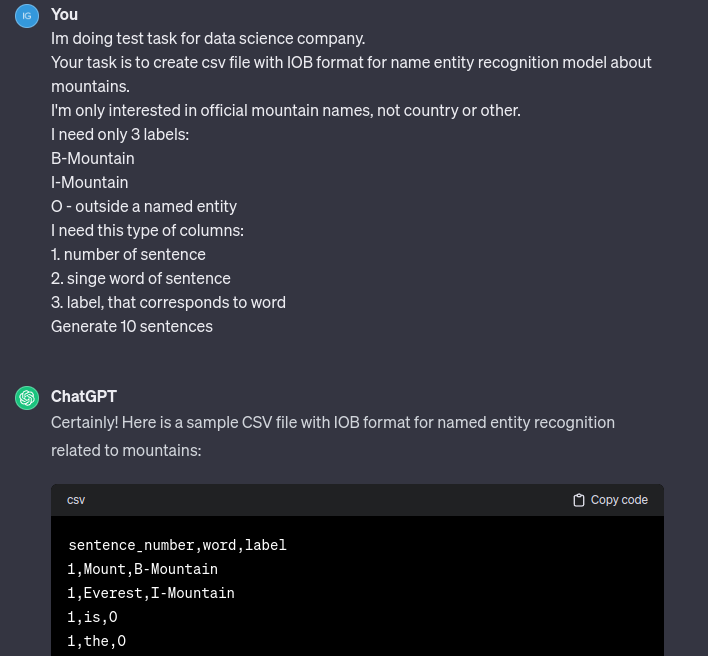 \
It was necessary to make 1 word and a time, because in other way there was a lot mistakes, where the length of labels were smaller, than an actual length of sentence.

### I've created 100 sentences, lets take a look:

In [22]:
data = pd.read_csv('./data/generated.csv')
data.head()

,sentence_number,word,label
0,1,Mount,B-Mountain
1,1,Everest,I-Mountain
2,1,is,O
3,1,the,O
4,1,highest,O


In [23]:
labels_to_ids = {k: v for v, k in enumerate(data.label.unique())}
labels_to_ids

{'B-Mountain': 0, 'I-Mountain': 1, 'O': 2}

In [24]:
ids_to_labels = {v: k for v, k in enumerate(data.label.unique())}
ids_to_labels

{0: 'B-Mountain', 1: 'I-Mountain', 2: 'O'}

Now i will do some manipulations for future usage of dataset:

In [25]:
# let's create a new column called "sentence" which groups the words by sentence 
data['sentence'] = data[['sentence_number','word','label']].groupby(['sentence_number'])['word'].transform(lambda x: ' '.join(x))
# let's also create a new column called "word_labels" which groups the tags by sentence 
data['word_labels'] = data[['sentence_number','word','label']].groupby(['sentence_number'])['label'].transform(lambda x: ','.join(x))

In [27]:
data = data[["sentence", "word_labels"]].drop_duplicates().reset_index(drop=True)
data.head()

,sentence,word_labels
0,Mount Everest is the highest peak in the world,"B-Mountain,I-Mountain,O,O,O,O,O,O,O"
1,K2 is the second highest mountain,"B-Mountain,O,O,I-Mountain,O,O"
2,The Andes are the longest mountain range,"O,B-Mountain,O,O,O,O,O"
3,Denali is the highest peak in North America,"B-Mountain,O,O,I-Mountain,O,O,O,O"
4,Kangchenjunga is the third highest mountain,"B-Mountain,O,O,I-Mountain,O,O"


In [15]:
# save dataset
data.to_csv('./data/train.csv', index=False)